# \[R\] synthpop

김보람  
2023-03-29

https://cran.r-project.org/web/packages/synthpop/synthpop.pdf

-   R에서의 synthpop사용

In [1]:
library(synthpop)

Find out more at https://www.synthpop.org.uk/


In [3]:
rm(list = ls())                # to clean out workspace

# data: SD2011

In [4]:
help(SD2011)                   # this will give you information about it

In [5]:
dim(SD2011)                    # get size of data frame 

In [6]:
codebook.syn(SD2011)$tab       # get summary info about variables

-   “bmi”변수는 “height”와 “weight”에서 파생

In [8]:
mydata <- SD2011[, c(1, 3, 6, 8, 11, 17, 18, 19, 20, 10)] 
codebook.syn(mydata)$tab 

In [9]:
table(mydata$income[mydata$income < 0], useNA = "ifany")


# 예제1

In [10]:
mysyn <- syn(mydata, cont.na = list(income = -8))  # default syntheis but adding -8 missing values for income


Synthesis
-----------
 sex agegr edu socprof marital depress trust trustfam trustneigh income


In [11]:

summary(mysyn)

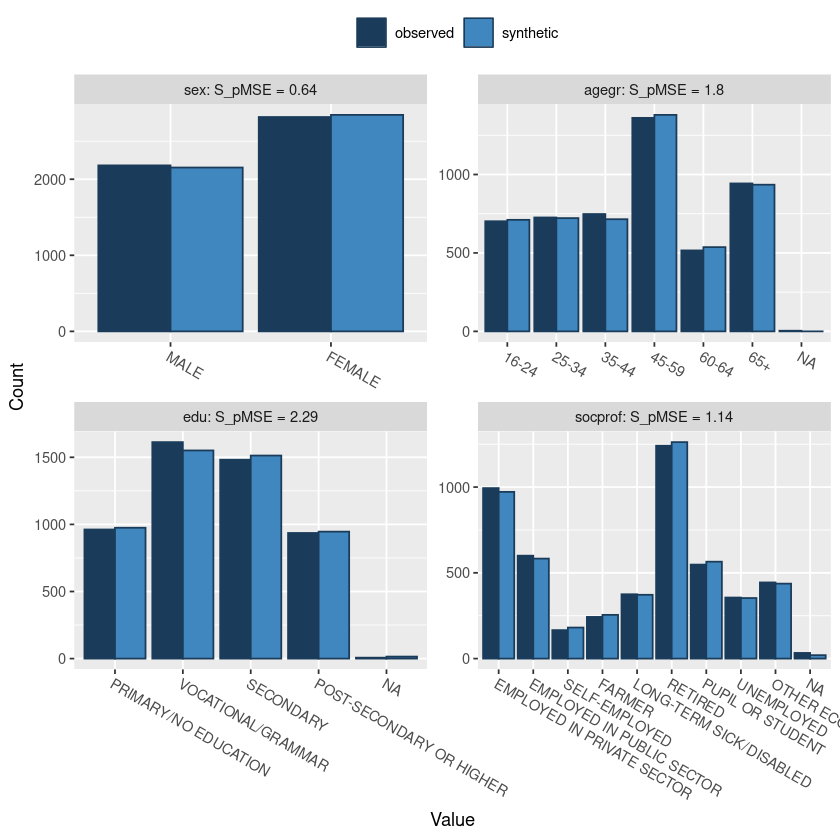

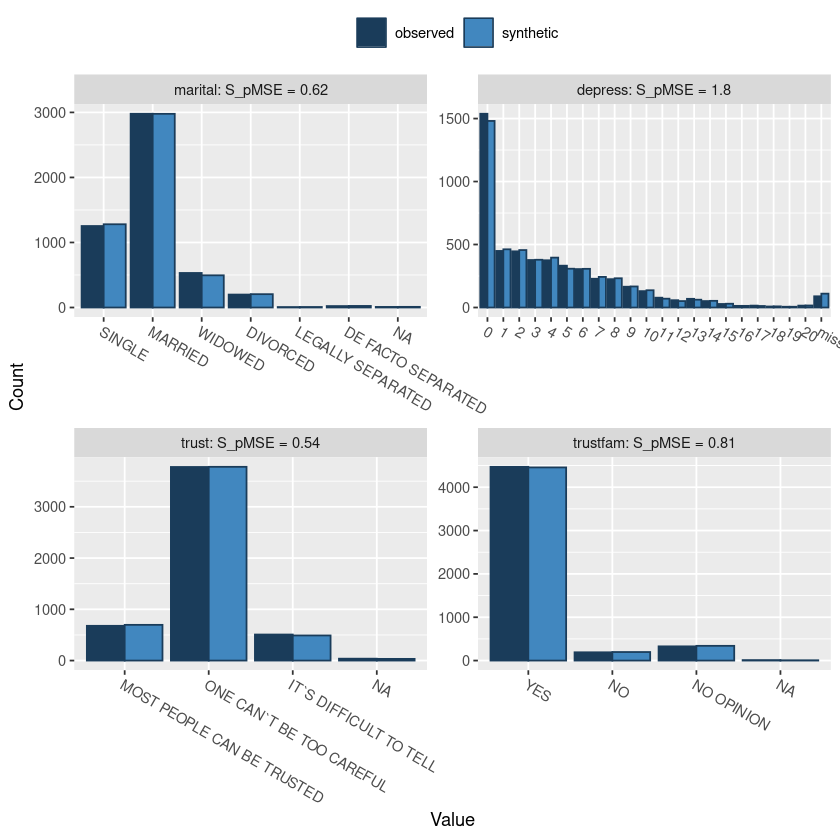

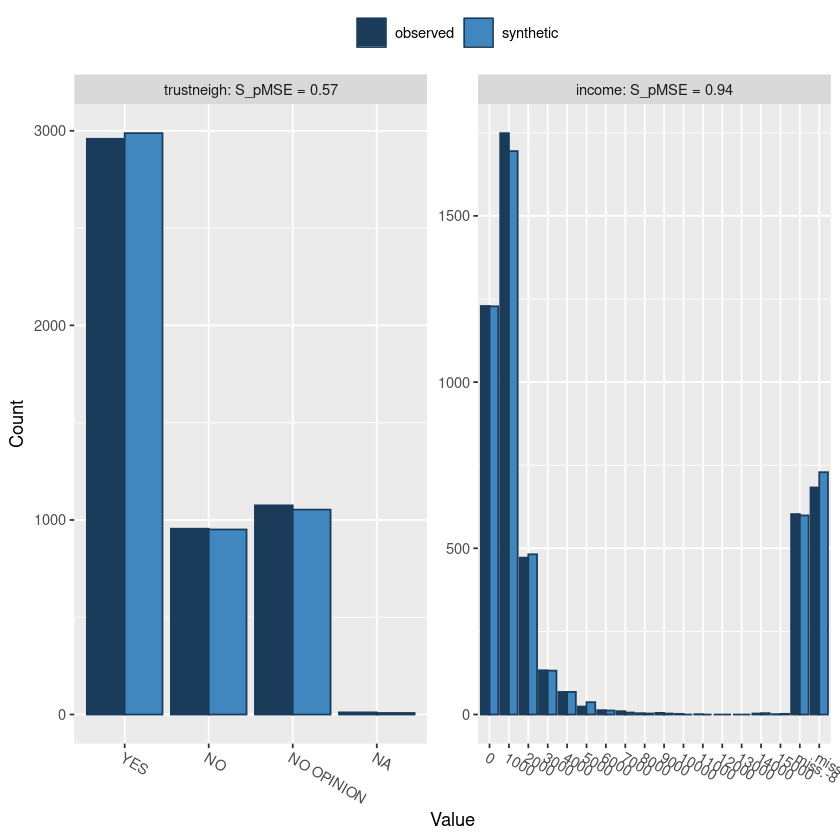

In [12]:
compare(mysyn, mydata, stat = "counts")

In [13]:
# Export to SPSS
write.syn(mysyn, filename = "mysyn", filetype = "SPSS")

Synthetic data exported as SPSS file(s).
Information on synthetic data written to
  /home/coco/Dropbox/coco/posts/synthesis_info_mysyn.txt 

In [14]:
names(mysyn)
mysyn$method
mysyn$predictor.matrix
mysyn$visit.sequence
mysyn$cont.na


Plots of  marital  by  sex 
Numbers in each plot (observed data):

sex
  MALE FEMALE 
  2182   2818 

Plots of  income  by  agegr 
Numbers in each plot (observed data):

agegr
16-24 25-34 35-44 45-59 60-64   65+  <NA> 
  702   726   748  1361   516   943     4 

Plots of  income  by  edu 
Numbers in each plot (observed data):

edu
    PRIMARY/NO EDUCATION       VOCATIONAL/GRAMMAR                SECONDARY 
                     962                     1613                     1482 
POST-SECONDARY OR HIGHER                     <NA> 
                     936                        7 

Warning message:
“The dot-dot notation (`..count..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(count)` instead.
ℹ The deprecated feature was likely used in the synthpop package.
  Please report the issue to the authors.”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 1412 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Removed 1412 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 1412 rows containing missing values (`geom_point()`).”

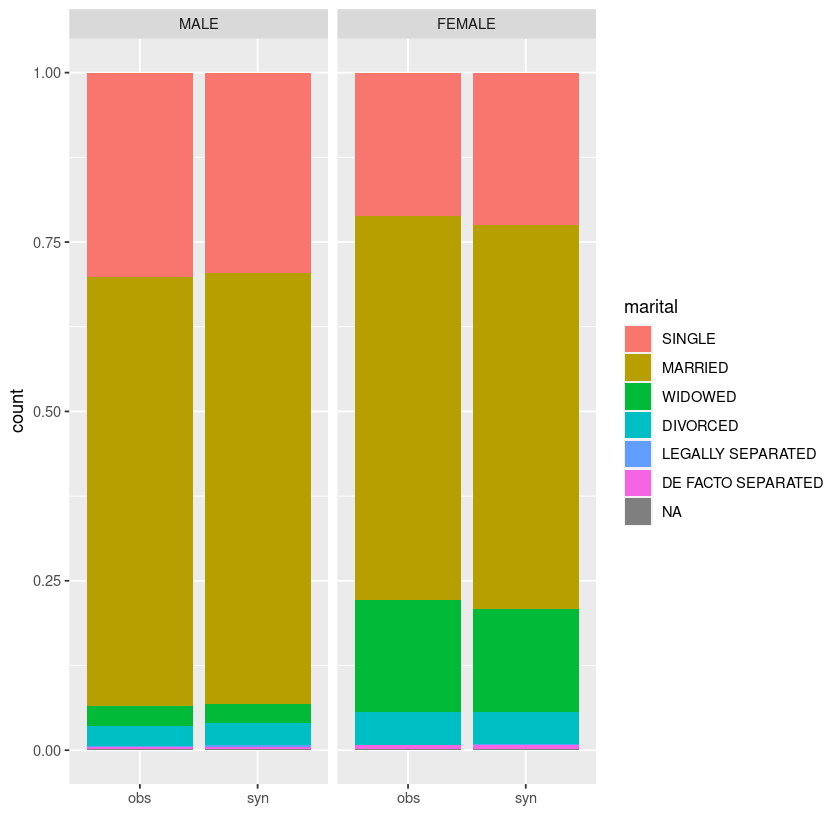

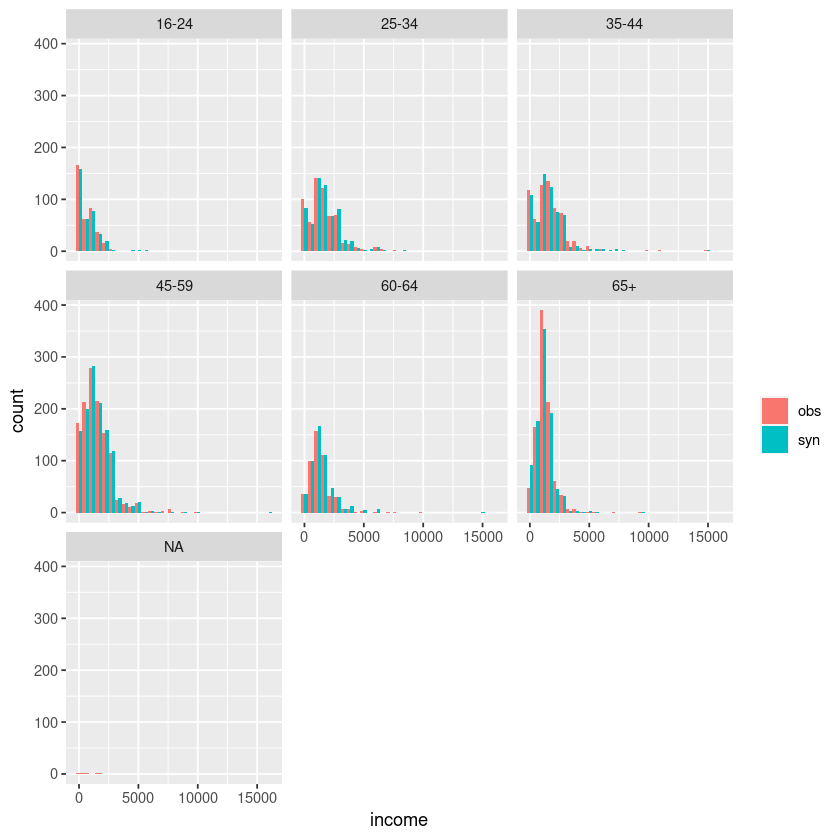

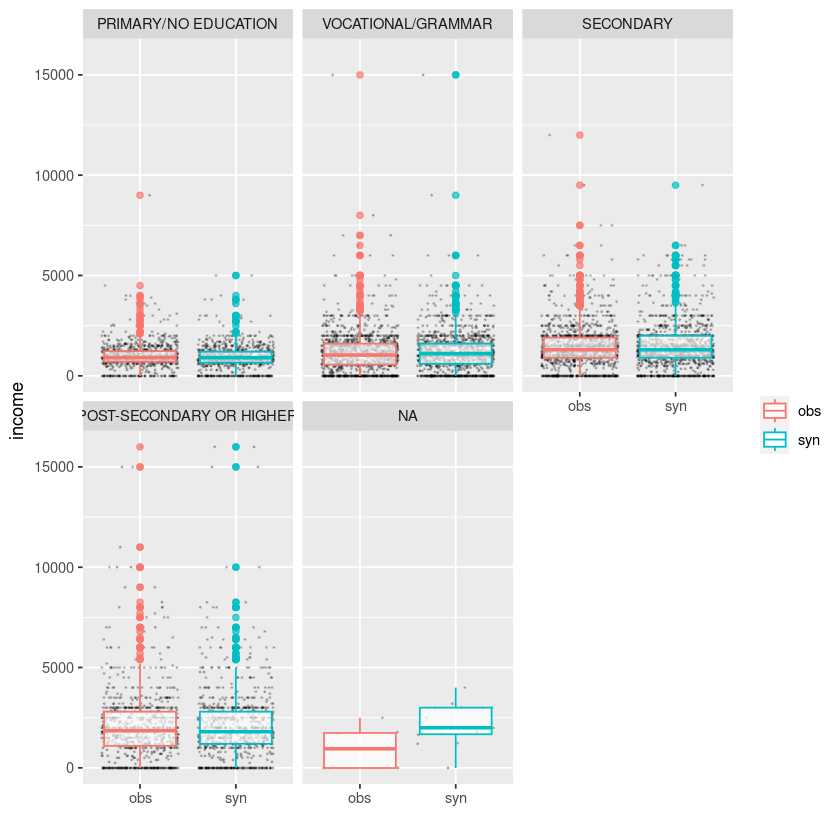

In [15]:

multi.compare(mysyn, mydata, var = "marital", by = "sex")
multi.compare(mysyn, mydata, var = "income", by = "agegr")
multi.compare(mysyn, mydata, var = "income", by = "edu", cont.type = "boxplot")


# 예제2

In [17]:
test1 <- SD2011[, c("sex", "age", "placesize", "smoke")]
summary(test1)
ls()


Synthesis
-----------
 sex age placesize smoke

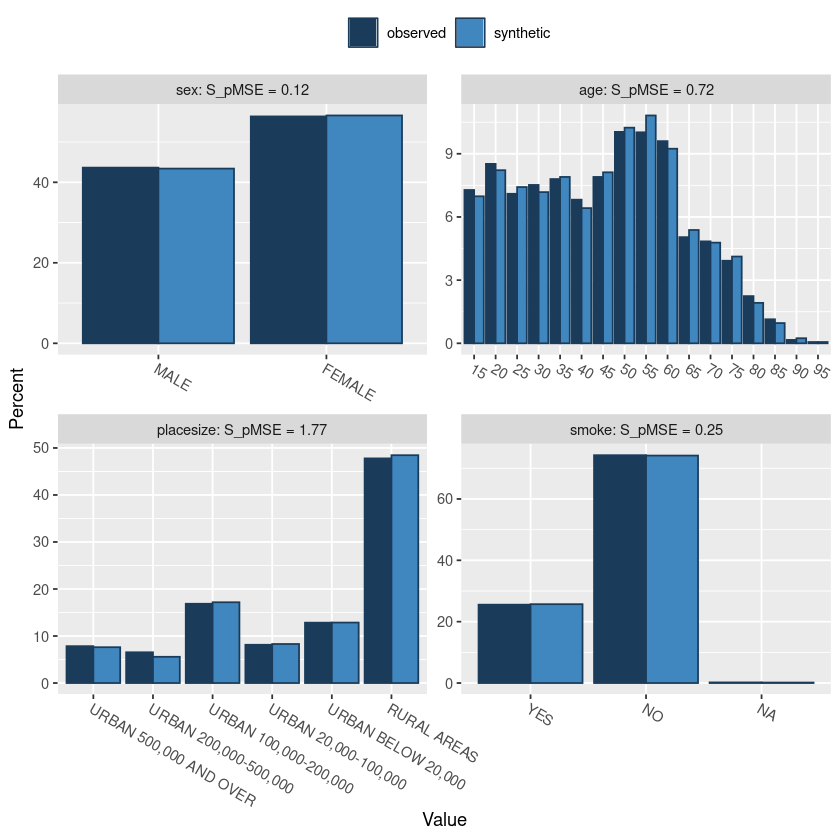

In [18]:
syn1 <- syn(test1)
compare(syn1, test1)


In [19]:
names(syn1) # to find their names
syn1$call # to examine a specific one


Method "ctree" is not valid for a variable without predictors (smoke)
Method has been changed to "sample"


Synthesis
-----------
 smoke placesize age sex

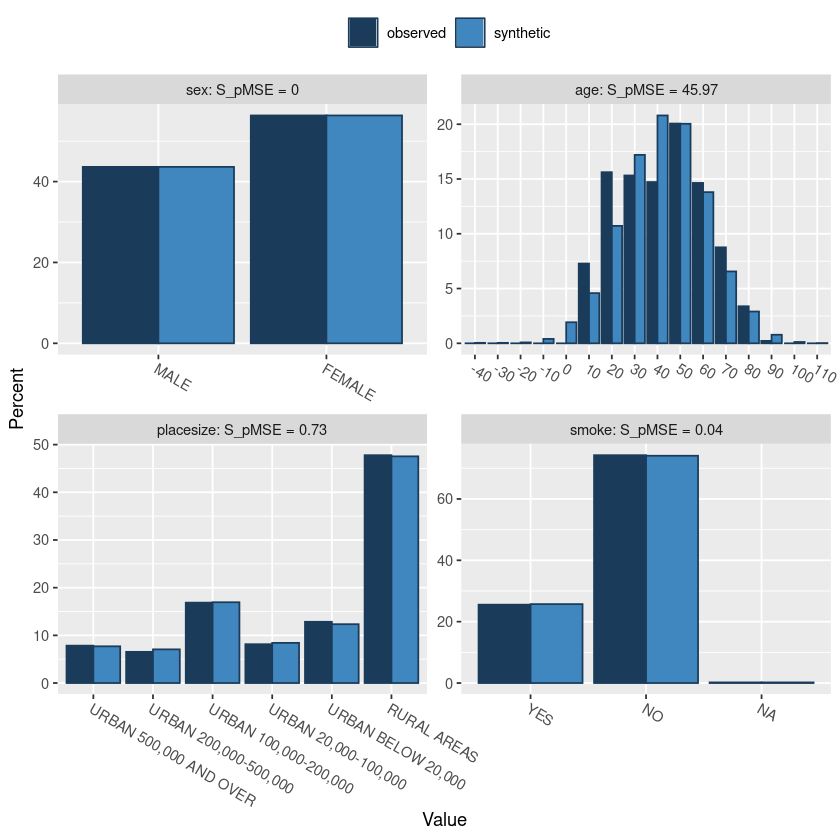

In [20]:
syn2 <- syn(test1, visit.sequence = 4:1,
method = c("sample", "norm", "ctree", "ctree"))
compare(syn2, test1)



Plots of  placesize  by  sex 
Numbers in each plot (observed data):

sex
  MALE FEMALE 
  2182   2818 

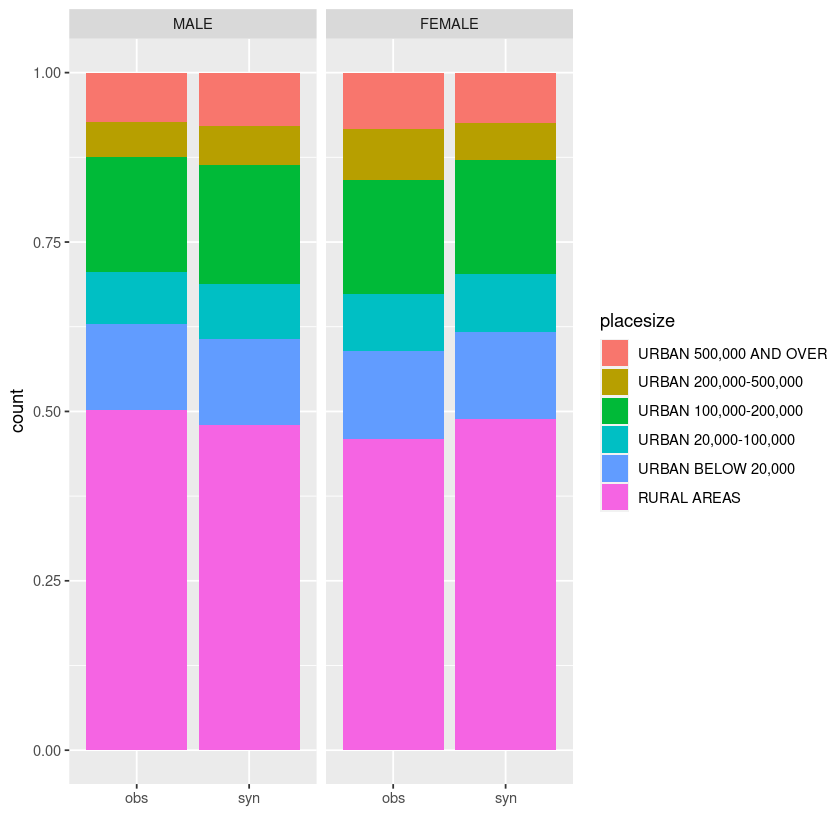

In [23]:
multi.compare(syn1, test1, var = "placesize", by = c("sex"))

In [25]:
utility.tab(syn1, test1, c("age", "sex"))

In [26]:
synfit2 <- glm(smoke ~ sex + placesize + poly(age,2), data = syn1$syn,
 family = "binomial") # predicting smoke including
 # a quadratic age term


In [27]:
synfit2

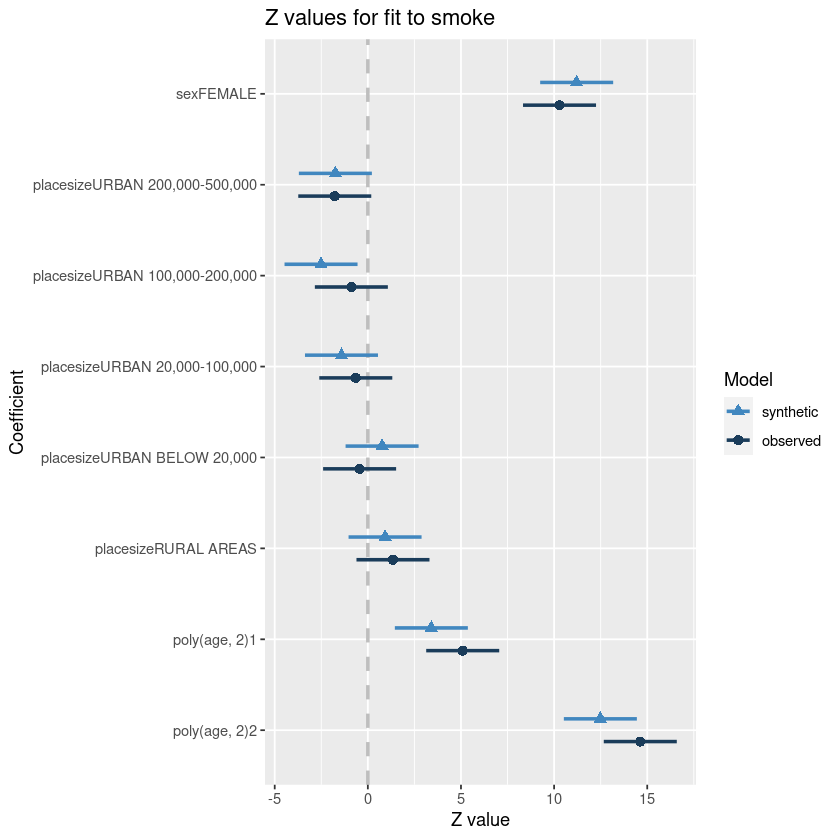

In [28]:
synfit.synds <- glm.synds(smoke ~ sex + placesize + poly(age,2), data= syn1,
 family = "binomial")
compare(synfit.synds, test1)
